In [10]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

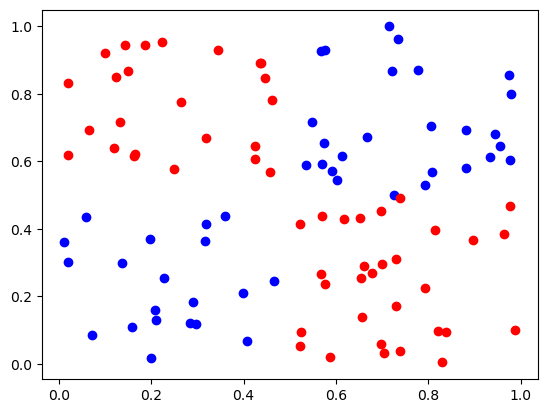

In [11]:
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.logical_xor(X[:, 0] > 0.5, X[:, 1] > 0.5).astype(int)

class_0 = X[y == 0]
class_1 = X[y == 1]

plt.scatter(class_0[:, 0], class_0[:, 1], c='blue')
plt.scatter(class_1[:, 0], class_1[:, 1], c='red')
plt.show()

In [12]:
class MPL:
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_deriv(self, x):
        return x / (1 + x)
    
    
    def __init__(self, n_input=2, n_hiden=[2], n_out=2):
        self.n_input = n_input
        self.n_hiden = n_hiden
        self.n_out = n_out
        layers = [n_input] + n_hiden + [n_out]
        self.w = [np.random.uniform(-1, 1, (layers[i], layers[i + 1])) for i in range(len(layers) - 1)]
        self.h = [np.zeros(layers[i]) for i in range(len(layers))]
        self.g = [np.zeros((layers[i], layers[i + 1])) for i in range(len(layers) - 1)]

        
    def forward(self, X):
        self.h[0] = X
        for i, w in enumerate(self.w):
            t = self.h[i].dot(w)
            self.h[i+1] = self.sigmoid(t)
        return self.h[-1][0]
    
    
    def predict(self, X):
        out = self.forward(X)
        return np.round(out).astype(int)
    
    
    def backward(self, e):
        for i in reversed(range(len(self.g))):
            d = e * self.sigmoid_deriv(self.h[i+1])
            dT = d.reshape(d.shape[0], -1).T
            self.g[i] = self.h[i].reshape(self.h[i].shape[0], -1).dot(dT)
            e = d.dot(self.w[i].T)
        return e
    
    
    def gradient_descent(self, lr):
        for i in range(len(self.w)):
            self.w[i] += self.g[i] * lr
            
            
    def mse(self, y_pred, y_real):
        return 1 / 2 * np.sum(np.square(y_pred - y_real))
    
    
    def fit(self, X_train, y_train, epochs=100, lr=0.1):
        loss = []
        for e in tqdm(range(epochs)):
            outs = np.empty(y_train.shape[0])
            for j, (X, y) in enumerate(zip(X_train, y_train)):
                outs[j] = self.forward(X)
                error = y - outs[j]
                self.backward(error)
                self.gradient_descent(lr)
            loss.append(self.mse(outs, y_train))
        plt.plot(range(len(loss)), loss) 
        plt.show() 
        
        
    def test(self, X, y):
        outs = np.empty(y.shape[0])
        for i in range(y.shape[0]):
            outs[i] = (self.predict(X[i]))
        print(f"mse: {self.mse(outs, y)}")
        return outs

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [02:03<00:00, 242.39it/s]


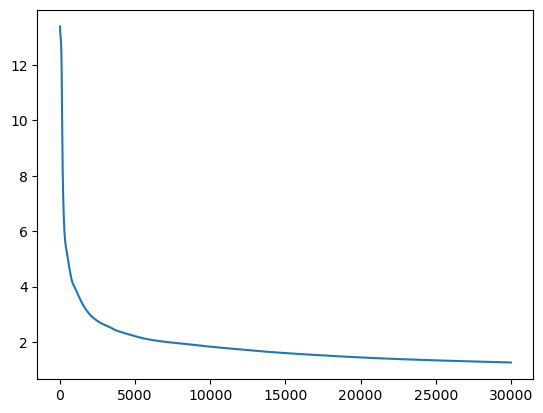

mse: 1.5


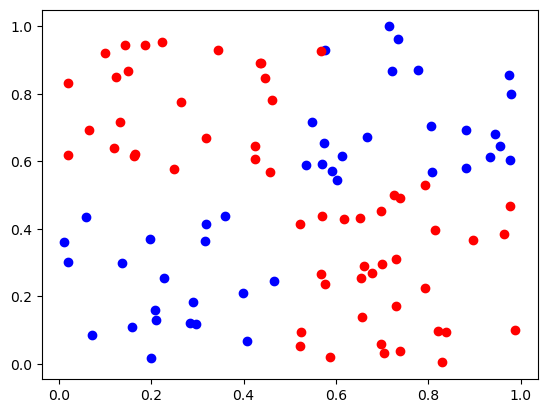

In [15]:
model = MPL(n_input=2, n_hiden=[32], n_out=1)
model.fit(X, y, lr=0.1, epochs=30000)
outs = model.test(X, y)
class_0 = X[outs == 0]
class_1 = X[outs == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue')
plt.scatter(class_1[:, 0], class_1[:, 1], c='red')
plt.show()